In [3]:
import pandas as pd
import recursos as rq

# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

# Desafío de regresión

Predecir el precio de venta de una propiedad residencial depende de varios factores, incluida la antigüedad de la propiedad, la disponibilidad de servicios locales y la ubicación.

En este desafío, utilizará un conjunto de datos de transacciones de venta de bienes raíces para predecir el precio por unidad de una propiedad en función de sus características. El precio por unidad en estos datos se basa en una unidad de medida de 3,3 metros cuadrados.

> **Cita**: Los datos utilizados en este ejercicio provienen del siguiente estudio:
>
> *Yeh, I. C. y Hsu, T. K. (2018). Construcción de modelos de valoración inmobiliaria con enfoque comparativo mediante razonamiento basado en casos. Informática blanda aplicada, 65, 260-271.*
>
> Se obtuvo del repositorio de conjuntos de datos de la UCI (Dua, D. y Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University de California, Escuela de Información y Ciencias de la Computación).

## Revisa los datos

Ejecute la siguiente celda para cargar los datos y ver las primeras filas.

In [4]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')


Los datos consisten en las siguientes variables:

- **transaction_date**: la fecha de la transacción (por ejemplo, 2013.250=marzo de 2013, 2013.500=junio de 2013, etc.)
- **house_age** - la edad de la casa (en años)
- **transit_distance** - la distancia a la estación de tren ligero más cercana (en metros)
- **local_convenience_stores**: la cantidad de tiendas de conveniencia a poca distancia
- **latitud** - la coordenada geográfica, latitud
- **longitud** - la coordenada geográfica, longitud
- **precio_por_unidad** precio de la vivienda por unidad de superficie (3,3 metros cuadrados)

## Entrena un modelo de regresión

Su desafío es explorar y preparar los datos, identificar características predictivas que ayudarán a predecir la etiqueta de **precio_por_unidad** y entrenar un modelo de regresión que logre el error cuadrático medio (RMSE) más bajo que pueda lograr (que debe ser inferior a **7**) cuando se evalúa frente a un subconjunto de datos de prueba.

Agregue celdas de descuento y código según sea necesario para crear su solución.

> **Nota**: No existe una única solución "correcta". Se proporciona una solución de muestra en [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [2]:
data = pd.read_csv('data/real_estate.csv')
# Datos faltantes
data.isna().sum()

NameError: name 'pd' is not defined

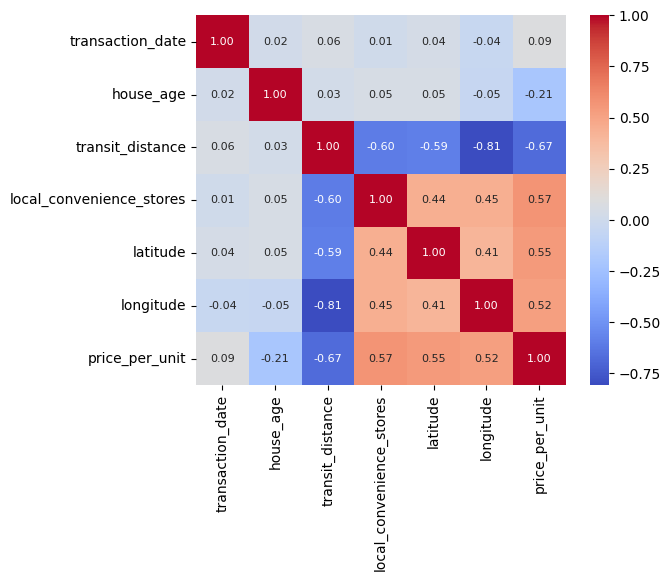

In [9]:
# Importamos librerias
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
%matplotlib inline 

corr = data.corr(method='pearson')
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm')
plt.show()

In [21]:
# Your code to explore data and train a regression model
# revisamos valores maximos y minimos de los datos 
colums = data.columns
for i in colums:
    print(i + ': ',data[i].min(), data[i].max())

transaction_date:  2012.667 2013.583
house_age:  0.0 43.8
transit_distance:  23.38284 6488.021
local_convenience_stores:  0 10
latitude:  24.93207 25.01459
longitude:  121.47353 121.56627
price_per_unit:  7.6 117.5


In [22]:
# deteccion de outliers
# Funcion que arroja los percentiles de un dataset
def quantiles(data):
    percentiles = [0.0, 0.1, 0.25, 0.50, 0.75, 0.95, 1]
    df_data_perc = pd.DataFrame(data.quantile(percentiles))
    return df_data_perc

In [1]:
a = 1

In [5]:
import recursos as rq
help(rq.cut_cuantiles)

Help on function cut_cuantiles in module recursos:

cut_cuantiles(data, name_column: str, rango: float, type_cut=True, less_equal=True)
    Selecciona datos menores o mayores para cierto umbral de cuantiles
    data [Dataframe]   : Set de datos en formato pandas
    name_column [str]   : Nombre de la columna a recortar (debe encontrarse dentro del set de datos)
    type_cut [Bool]     : Tipo de recorte:
                            True --> rangos cuantilicos
                            False --> rangos numericos 
    rangos [float]      : Rango de recorte 
    less_equal [bool]   : Recorte:
                            True  --> menor igual que el rango
                            False --> mayor igual que el rango
    
    Por defecto:
        type_cute --> True, less_equal --> True



In [23]:
# percentiles 
quantiles(data)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0.00,2012.667,0.000,23.38284,0.0,24.932070,121.473530,7.600
0.10,2012.750,3.500,157.60520,0.0,24.951299,121.512370,21.020
0.25,2012.917,9.025,289.32480,1.0,24.963000,121.528085,27.700
0.50,2013.167,16.100,492.23130,4.0,24.971100,121.538630,38.450
0.75,2013.417,28.150,1454.27900,6.0,24.977455,121.543305,46.600
0.95,2013.583,37.735,4082.01500,9.0,24.985704,121.549053,59.175
1.00,2013.583,43.800,6488.02100,10.0,25.014590,121.566270,117.500


In [24]:
# Filtro de outliers

# transit_distance [0.1 - 0.95]
transit_distance_01 = data.transaction_date.quantile(0.1)
transit_distance_95 = data.transaction_date.quantile(0.95)
# data = data[data.transaction_date > transit_distance_01]
# data = data[data.transaction_date < transit_distance_95]

# price_per_unit [0.1 - 0.95]
price_per_unit_01 = data.price_per_unit.quantile(0.1)
price_per_unit_95 = data.price_per_unit.quantile(0.95)
#data = data[data.price_per_unit > price_per_unit_01]
data = data[data.price_per_unit < 70]


In [25]:
quantiles(data)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0.00,2012.667,0.000,23.38284,0.0,24.932070,121.473530,7.60
0.10,2012.750,3.600,157.19690,0.0,24.951200,121.512325,20.90
0.25,2012.917,9.100,289.32480,1.0,24.962990,121.527600,27.30
0.50,2013.167,16.150,492.94415,4.0,24.971100,121.538535,38.25
0.75,2013.417,28.050,1463.12275,6.0,24.977998,121.543222,46.10
0.95,2013.583,37.765,4082.01500,9.0,24.985716,121.549098,57.66
1.00,2013.583,43.800,6488.02100,10.0,25.014590,121.566270,69.70


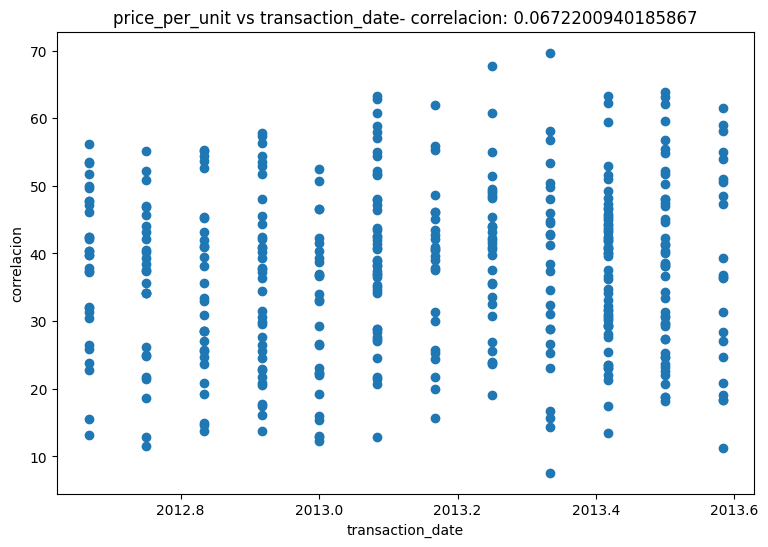

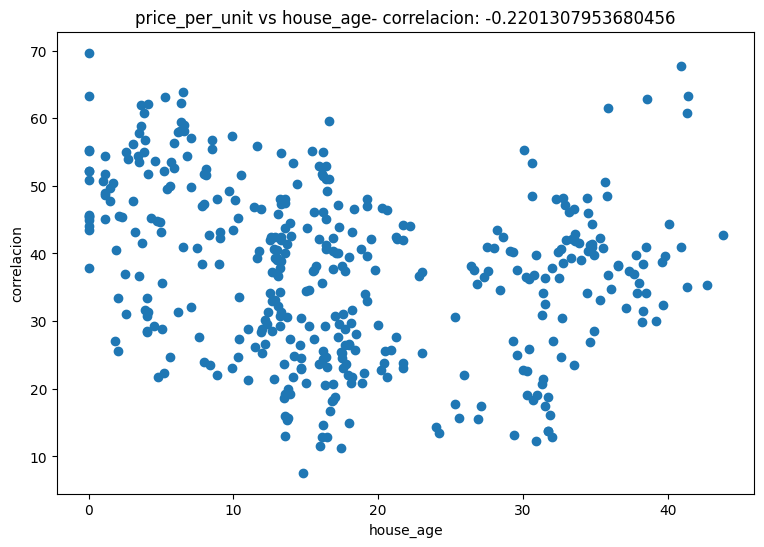

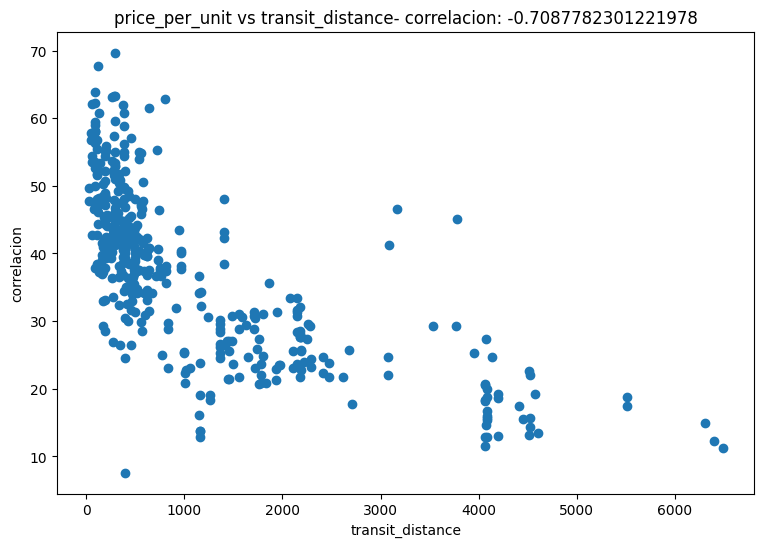

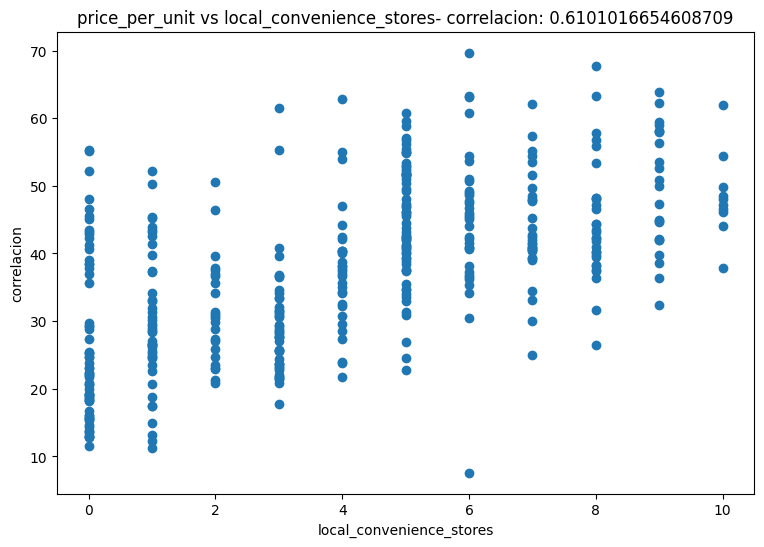

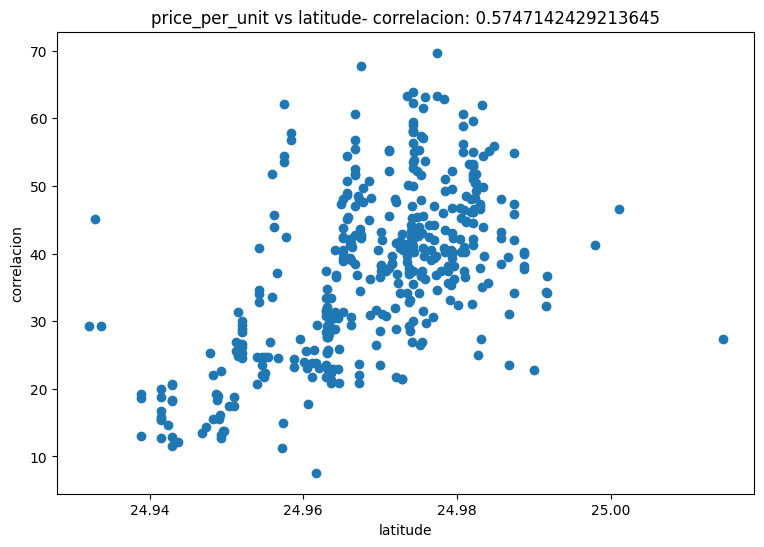

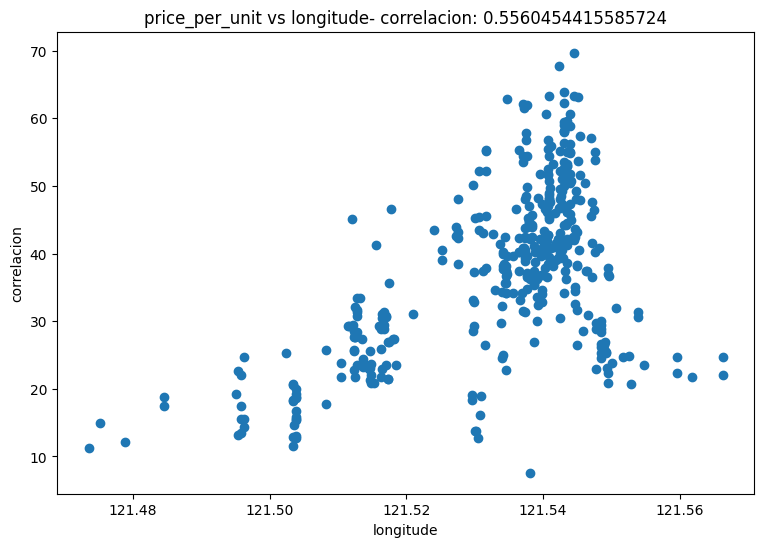

In [11]:
label = data[data.columns[-1]]

for col in data[data.columns[0:-1]]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[col]
    correlacion = feature.corr(label)
    plt.scatter(x = feature, y = label)
    plt.xlabel(col)
    plt.ylabel('correlacion')
    ax.set_title( str(label.name) + ' vs ' + col + '- correlacion: ' + str(correlacion))
plt.show()

## DATOS CATEGORICOS

In [12]:
# Entrenamiento del modelo

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [13]:
# Columnas para entrenamiento 
X  = data[['transit_distance','local_convenience_stores']] #, 'latitude', 'longitude']]
Y = data.price_per_unit

In [14]:
# Division de datos de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

sc_X = StandardScaler()     # escalado de datos
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [15]:
# Modelo de regresion
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
mean_squared_error(y_predict, y_test)

103.25959837015604

In [16]:
dicti = {'y_predict':y_predict,
         'y_test':y_test}
data_corr = pd.DataFrame(dicti)
data_corr.corr()

,y_predict,y_test
y_predict,1.000000,0.687486
y_test,0.687486,1.000000


## Usar el modelo entrenado

Guarde su modelo entrenado y luego utilícelo para predecir el precio por unidad para las siguientes transacciones de bienes raíces:

| fecha_transacción | casa_edad | distancia_de_tránsito | tiendas_de_conveniencia_locales | latitud | longitud |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [1]:
# Your code to use the trained model
a = 2

In [2]:
import pandas as pd 
dat = pd.DataFrame()

In [4]:
import graficas as gr

c:\Users\personal\Documents\LIBROS\HENRY DTF - 03\Textos\MICROSOFT LEAR\RUTA 1 - ML\13 - Deep Learning Basic\ml-basics\challenges\graficas.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


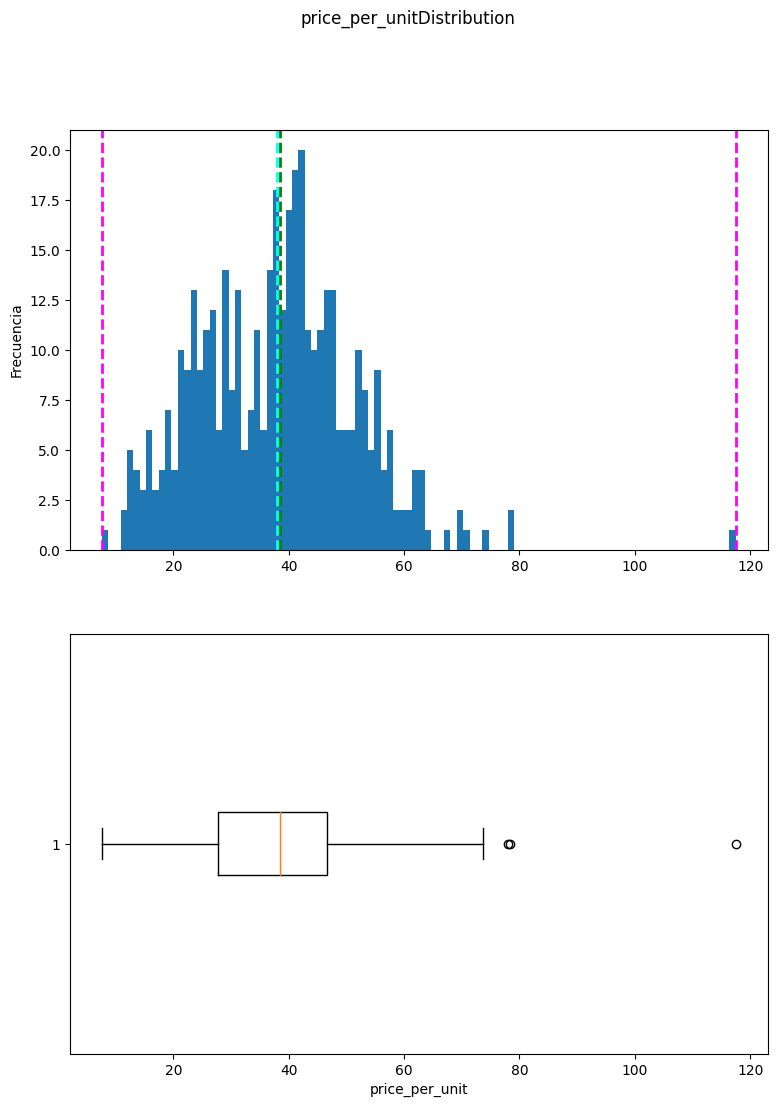

In [7]:
gr.fun_distribucion_Data(data.price_per_unit)